CHURN PREDICTION USING ML TECHNIQUE

Name : Hishana

Evaluation Date : 28/10/2024

TABLE OF CONTENT

1.Introduction

2.Objective

3.Data Collection

4.Data Describtion

5.EDA & Data Preprosessing

6.Visualization

7.Handling Unbalenced Data With SMOTE

8.Spliting The Dataset

9.Feature Scaling

10.Model Selection

11.Model Training And Evaluation

12.Save The Model

13.GUI

 INTRODUCTION:

In today’s highly competitive banking industry, retaining customers is crucial for maintaining growth and profitability. Customer churn, or the rate at which customers stop doing business with a bank, can have a significant financial impact. Predicting which customers are at risk of leaving allows banks to implement targeted retention strategies, ensuring a more loyal and satisfied customer base.

Bank Churn Prediction is a machine learning project that focuses on identifying customers who are likely to leave the bank. By analyzing customer behavior, financial transactions, and demographic data, we can develop a predictive model that classifies customers into two categories: those who will remain with the bank and those likely to churn. This prediction enables proactive customer management, helping banks reduce churn rates by understanding key factors influencing customer decisions.

OBJECTIVE:

The objective of this project is to build a machine learning model to predict customer churn using historical data. The dataset includes various features such as customer demographics, account balance, tenure, and activity level. The model will help identify customers at high risk of leaving, allowing the bank to take preventive measures to retain them.



DATA COLLECTION

[DATA](https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset)

DATA DESCRIPTION:

The dataset used in this project contains data on 10,000 customers of a bank. The features include:

CreditScore: Customer’s credit score.

Geography: The location of the customer (e.g., France, Spain).

Gender: Customer's gender.

Age: The age of the customer.

Tenure: The number of years the customer has been with the bank.

Balance: The account balance of the customer.

NumOfProducts: The number of products the customer has with the bank.

HasCrCard: Indicates whether the customer has a credit card.

IsActiveMember: Indicates whether the customer is an active bank member.

EstimatedSalary: The estimated salary of the customer.

Exited: The target variable, where 1 indicates the customer churned and 0 indicates they stayed.



EDA AND DATA PREPROSESSING

In [ ]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv('/Churn_Modelling.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
data.shape

(10000, 14)

In [ ]:
#It Has 10000 Raws And 14 colomns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#As We Can See There Are 10000 Entries And 14 Columns In Total,Amoung Those Columns 9 of Them Are Intiger Data Type,And There Are 3 Objects

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Drop Unnecessary Columns
#Some columns, like RowNumber, CustomerId, and Surname, are not useful for prediction, so we can drop them.
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
#lets Check Is Them Dropped Or Not
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Check for Missing Values
#We need to check if there are any missing values in the dataset.
missing_values = data.isnull().sum()
print(missing_values)

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
#Here We Can Clearly See That There Is No Null Values In The Data Set

In [ ]:
#Cheke For Duplicated Values
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [ ]:
#There Is No Duplicated Values

In [ ]:
#Encode Categorical Variables

#The categorical columns like Geography and Gender need to be converted into numerical form using encoding techniques.

#1.Label Encoding for Gender: Since Gender has only two categories (Male, Female), we can use label encoding.

# Label encode 'Gender'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])  # Male=1, Female=0

In [ ]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
#2.One-Hot Encoding for Geography: We can use One-Hot Encoding for Geography, as it has more than two categories.

# One-hot encode 'Geography'
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

#This will convert Geography into two new columns: Geography_Germany and Geography_Spain, with France being the reference category(To Avoid Dummy Variable Trap).


In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


OUT LEYER DETECTION

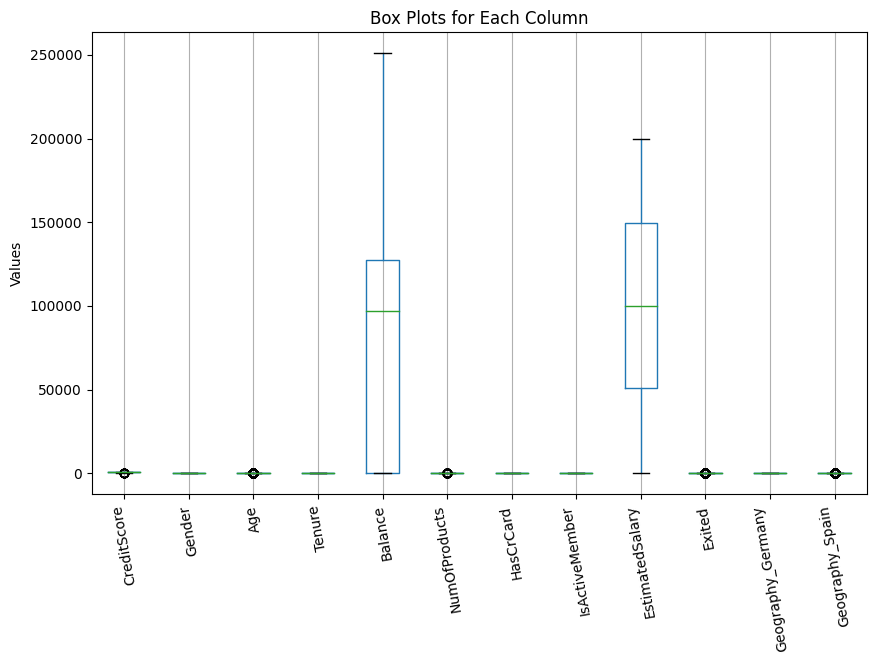

In [ ]:
#BOX PLOT

plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plots for Each Column')
plt.ylabel('Values')
plt.xticks(rotation=100)
plt.grid(axis='y')
plt.show()

In [ ]:
#There Is Out Leyiers In The Columns Age And CreditScore,Lets Deal With Them

REMOVE OUTLIERS(AGE)


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

#Filter Out Outliers
data_filtered=data[((data['Age']<(Q1-1.5*IQR))|(data['Age']>(Q3+1.5*IQR)))]


In [ ]:
data['Age'].count()

10000

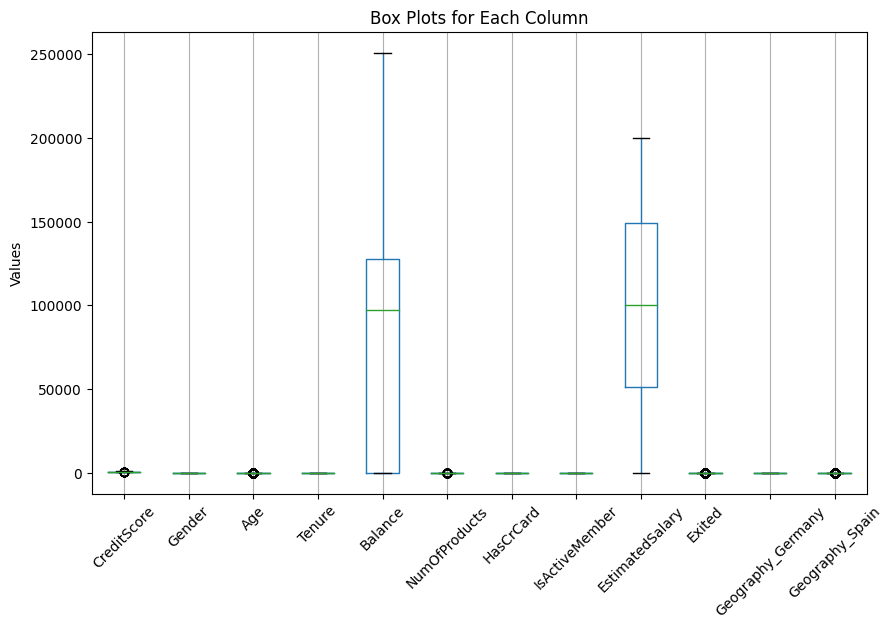

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Box Plots for Each Column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

DATA VISUALIZATION

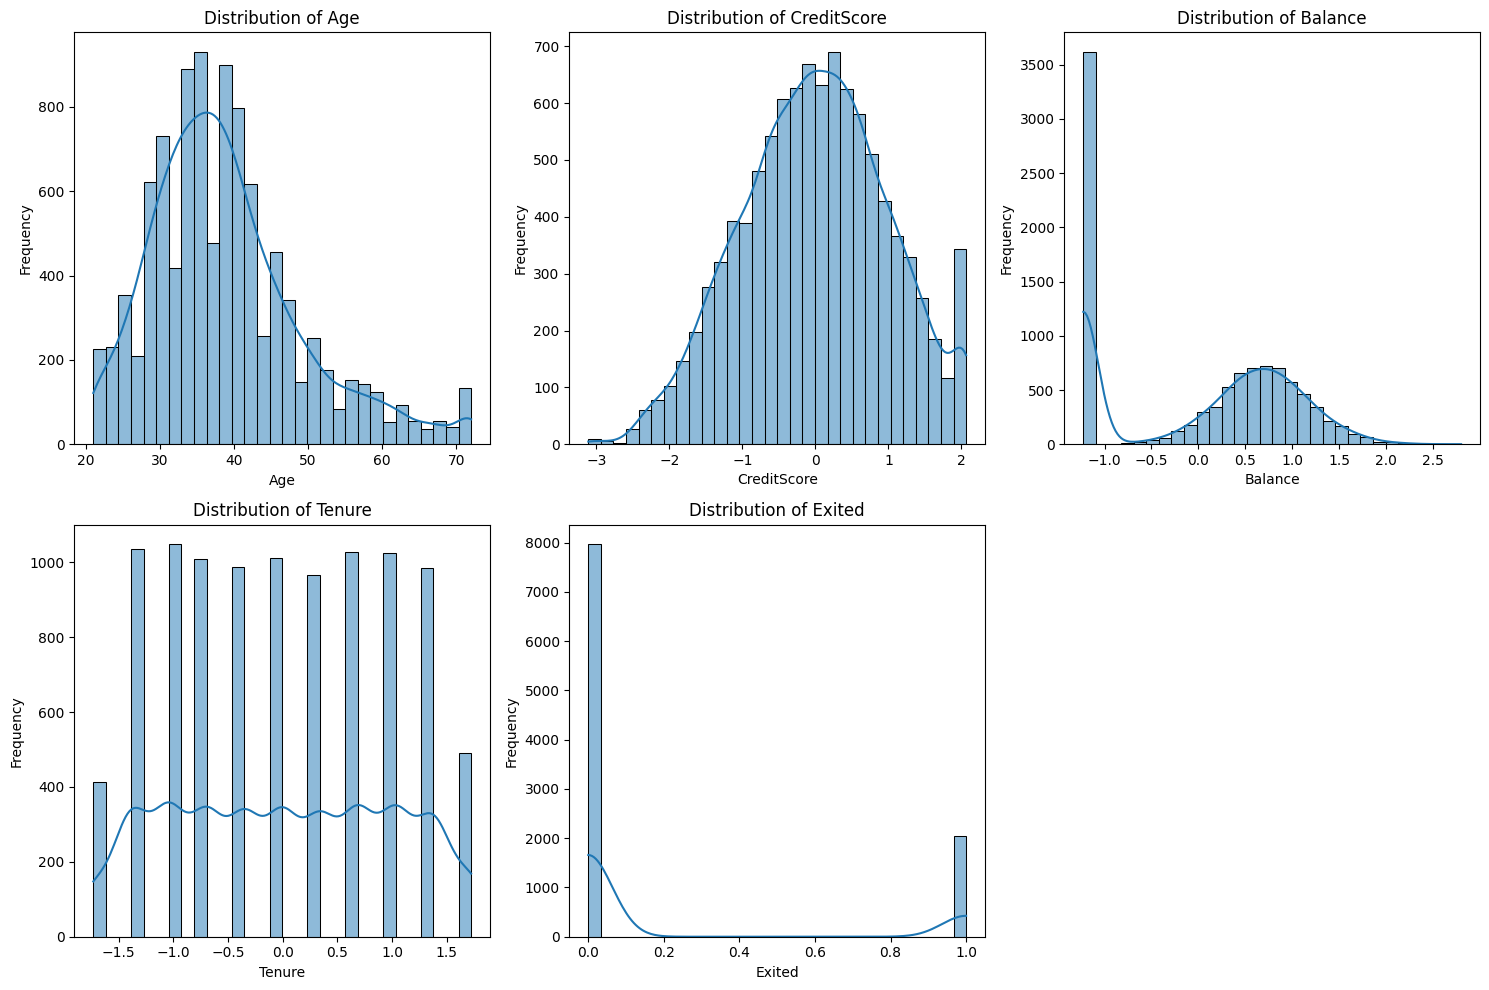

In [ ]:
#Univarient Analysis
#Visualise Individual Features Using Histograms
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the histograms
plt.figure(figsize=(15, 10))

# List of numerical features to visualize
features = ['Age', 'CreditScore', 'Balance', 'Tenure', 'Exited']

# Loop through the features to create individual histograms
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a subplot for each feature
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

It Shows Distribution Of Each Important Features

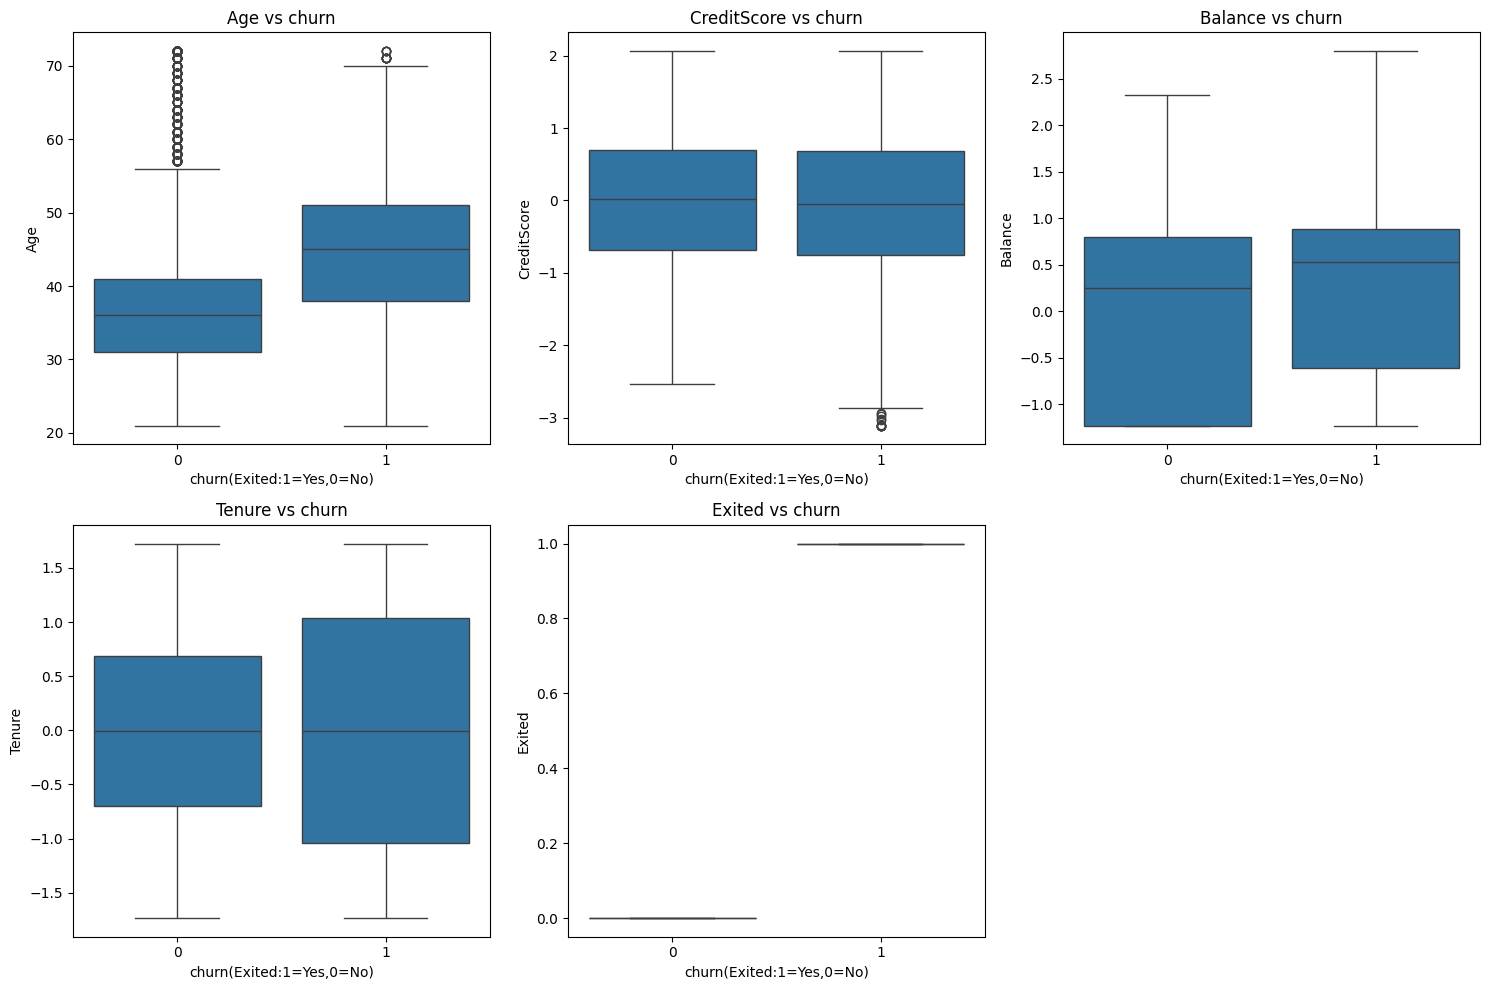

In [ ]:
#BOX PLOT
# Set the figure size for the histograms
plt.figure(figsize=(15, 10))

# List of numerical features to visualize the data
features = ['Age', 'CreditScore', 'Balance', 'Tenure', 'Exited']

# Loop through the features to create individual histograms
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)  # Create a subplot for each feature
    sns.boxplot(x='Exited',y=feature,data=data)
    plt.title(f'{feature} vs churn')
    plt.xlabel('churn(Exited:1=Yes,0=No)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

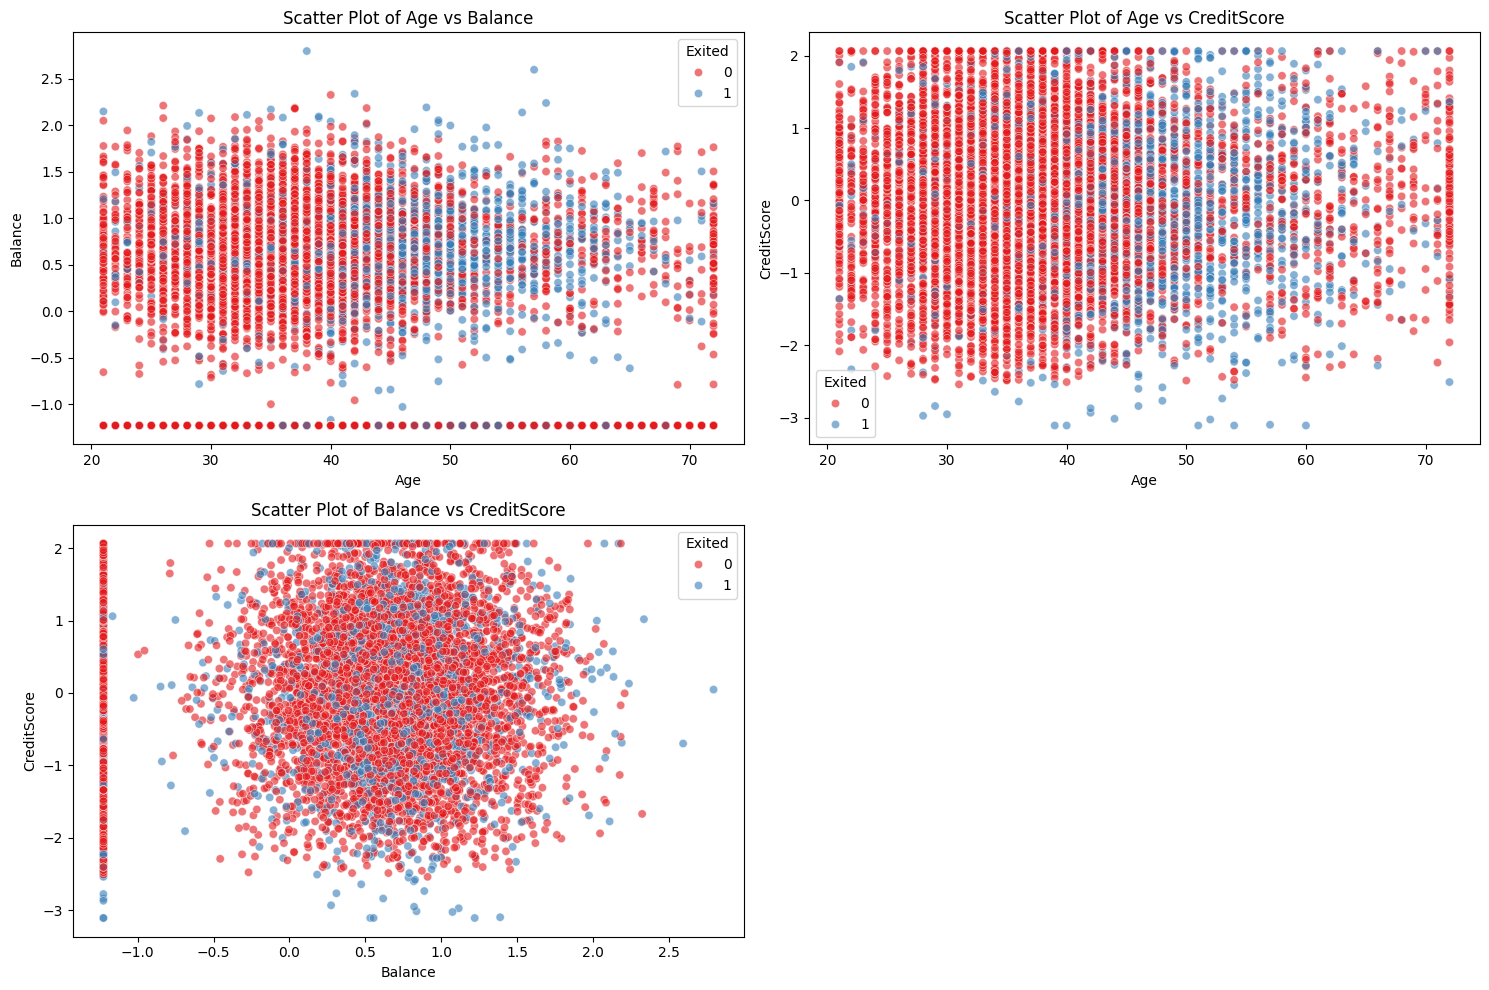

In [ ]:
#SCATTER PLOT
# Set the figure size for the scatter plots
plt.figure(figsize=(15, 10))

# Create scatter plots for selected pairs of features
features_pairs = [('Age', 'Balance'), ('Age', 'CreditScore'), ('Balance', 'CreditScore')]

# Loop through the feature pairs to create scatter plots
for i, (feature_x, feature_y) in enumerate(features_pairs):
    plt.subplot(2, 2, i + 1)  # Create a subplot for each pair
    sns.scatterplot(x=data[feature_x], y=data[feature_y], hue=data['Exited'], palette='Set1', alpha=0.6)
    plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)

plt.tight_layout()
plt.show()

In [ ]:
#For Multivariable Analysis

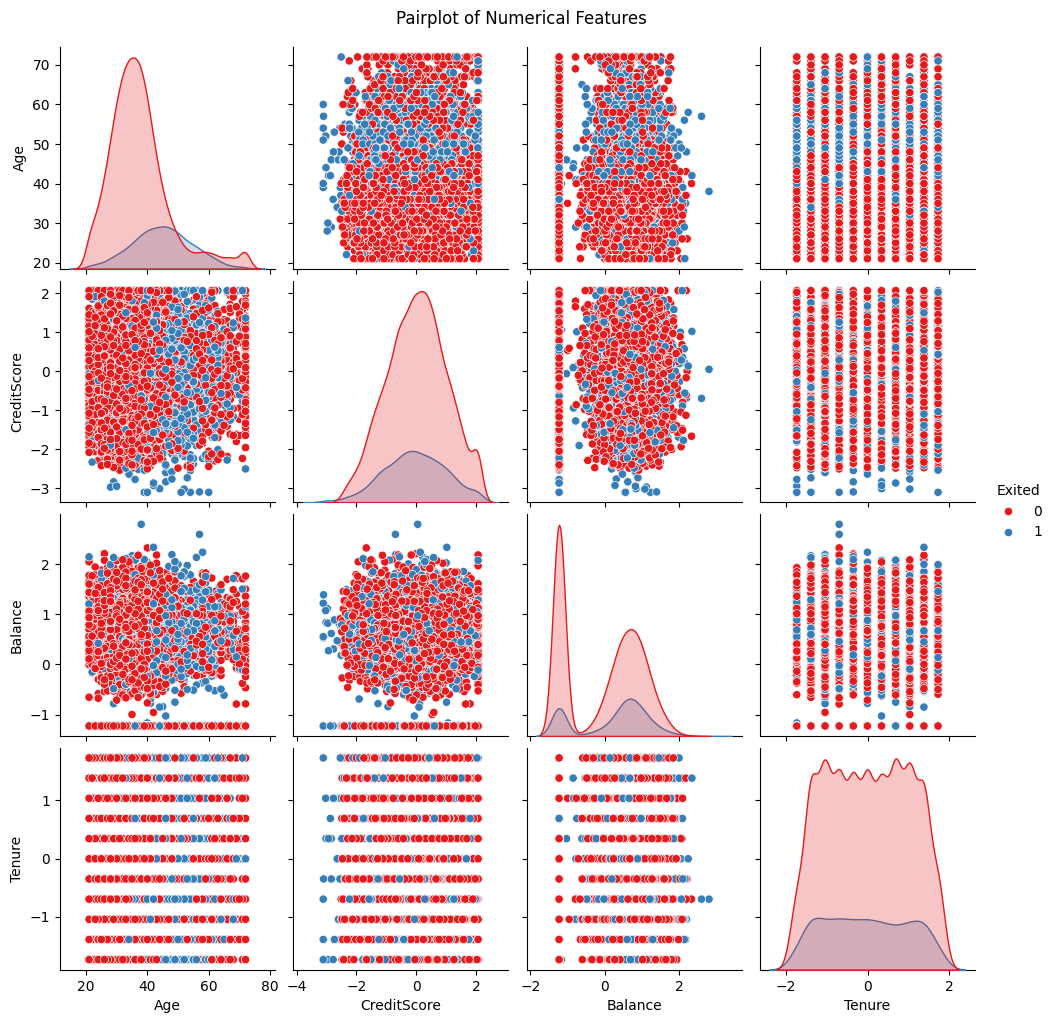

In [ ]:
#PAIRPLOT

# Select numerical features for the pairplot
numerical_features = ['Age', 'CreditScore', 'Balance', 'Tenure', 'Exited']

# Create a pairplot
sns.pairplot(data[numerical_features], hue='Exited', palette='Set1')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

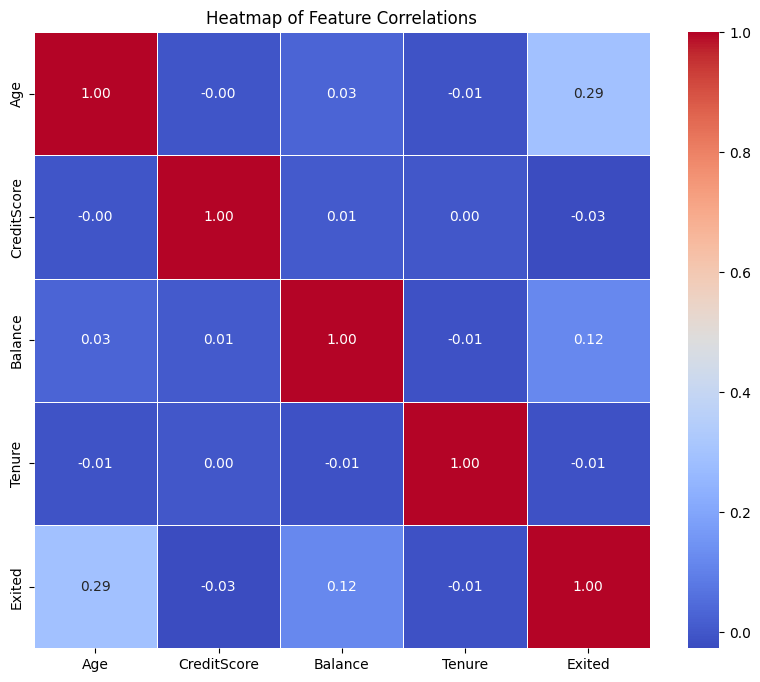

In [ ]:
#HEATMAP
# Compute the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [ ]:
#CHURN RATE BY GENDER

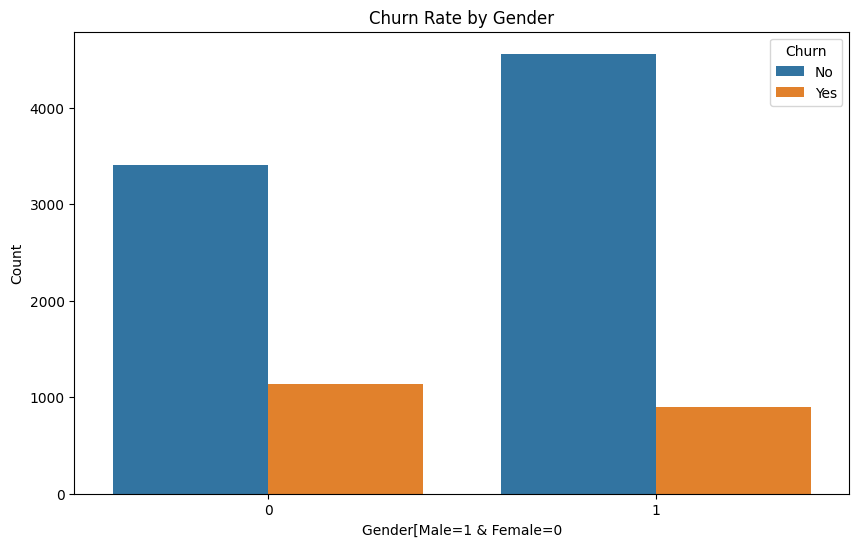

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender[Male=1 & Female=0')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()


Females Are More Likely To Churn Than Males

In [ ]:
#CHURN RATE BY AGE GROUP

C:\Users\HP\AppData\Local\Temp\ipykernel_43676\1483033093.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age = data.groupby('AgeGroup')['Exited'].mean().reset_index()


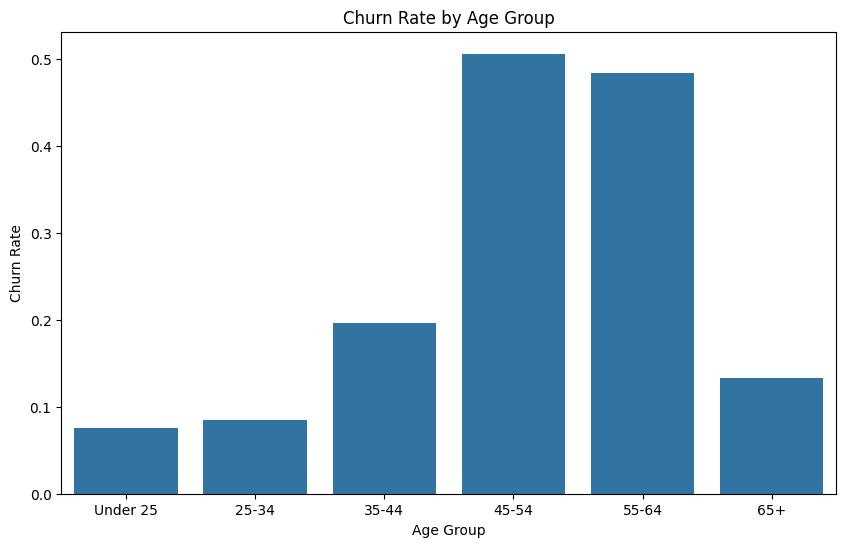

In [ ]:
# Create age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['Under 25', '25-34', '35-44', '45-54', '55-64', '65+'])

churn_rate_by_age = data.groupby('AgeGroup')['Exited'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Exited', data=churn_rate_by_age)
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()


Age Group Of 45-54 Are More Likely To Churn Follewed By Age Group 55-64

In [ ]:
#CHURN RATE BY BALANCE

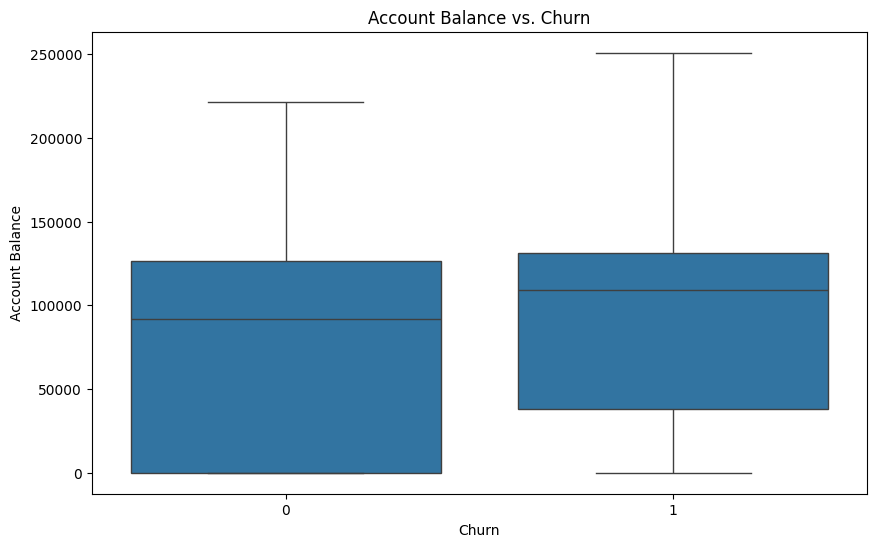

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Account Balance vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Account Balance')
plt.show()


Costemors With Higher Bank Balance May Stay

In [ ]:
#TENURE VS CHURN

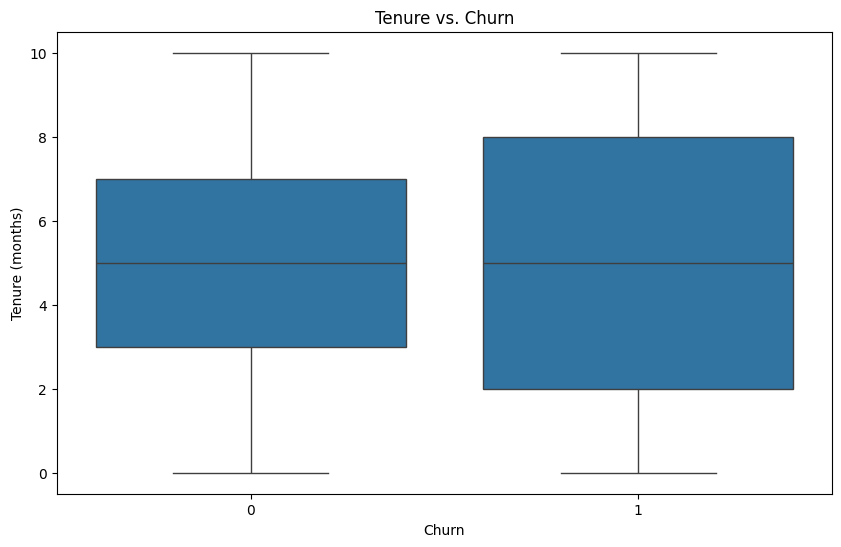

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Tenure', data=data)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


Custemors With Higher Tenure Have Higher Likelyhood Of Churn

In [ ]:
#CORRELATION HEATMAP

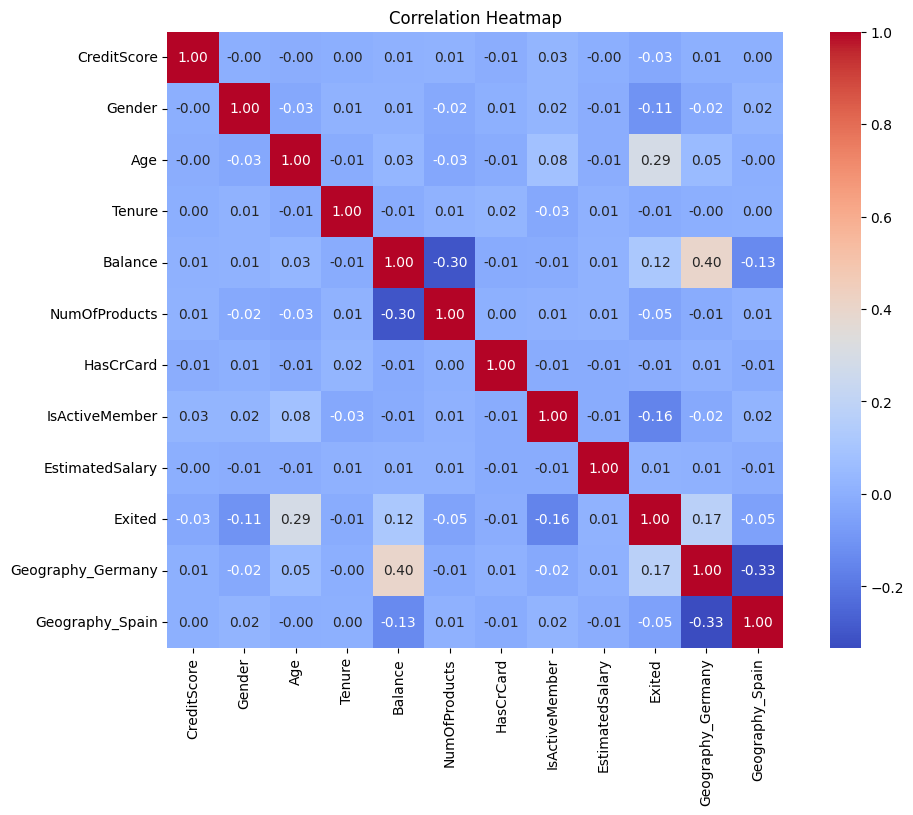

In [ ]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()


 It Give Us A Clear View On How Each Features Are Correlated

In [ ]:
#CHURN RATE BY AGE AND AGENDER

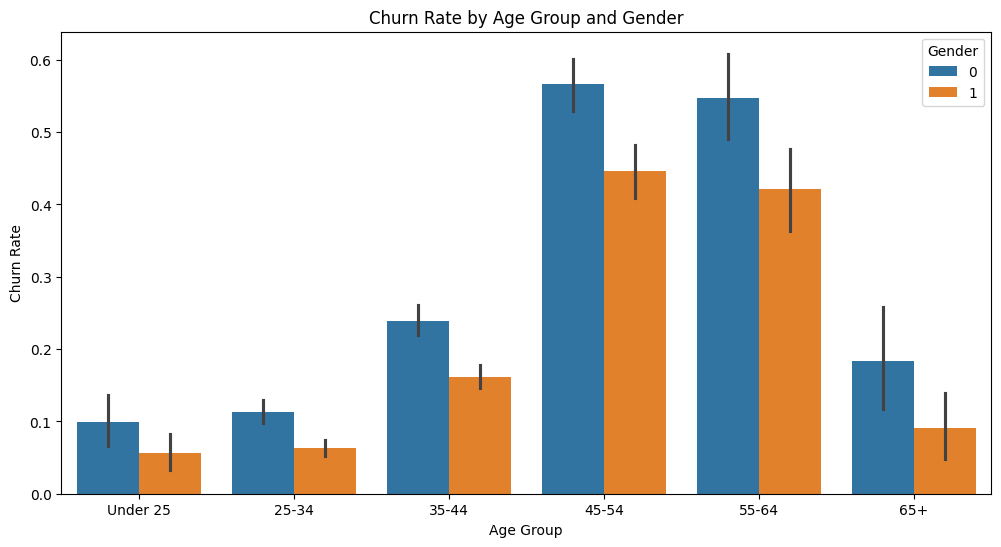

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', hue='Gender', y='Exited', data=data, estimator=np.mean)
plt.title('Churn Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.legend(title='Gender', loc='upper right')
plt.show()

Females Are More Likely To Churn Over All Age Groups And Age Goups 45-54 & 55-64 Have The Highest Churn Rate

HANDLING UNBALANCED DATA WITH SMOTE


In [ ]:
#Lets Check The Destribution Of The Target Variable
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

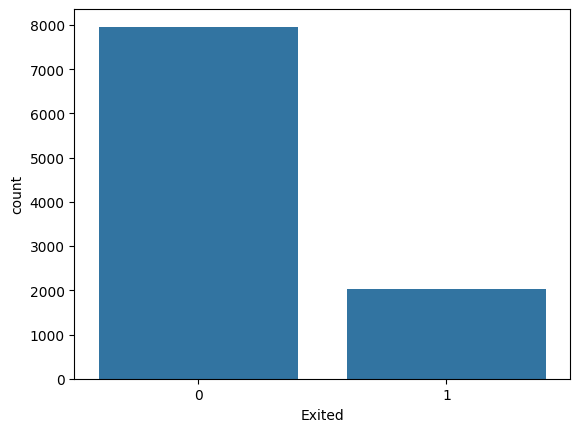

In [ ]:
sns.countplot(x='Exited', data=data)
plt.show()

In [ ]:
#As We Can See Its a Unbalanced Data set,We Have To Handle It.
#Now, separate the features (X) and the target variable (y, which is Exited in this case).

# Split the data into features (X) and target (y)
X = data.drop('Exited',axis=1)
X =X.drop('AgeGroup',axis=1)
y = data['Exited']

In [ ]:
#Here We Use a Method Called SMOTE
from imblearn.over_sampling import SMOTE
X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()


Exited
1    7963
0    7963
Name: count, dtype: int64

SPLITING THE DATASET INTO TRAINING SET AND TESTING SET

In [ ]:
#It’s essential to split the dataset into training and testing sets to evaluate the model's performance on unseen data.

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 1.01529059, -0.89895388,  0.85155095, ..., -0.63103411,
        -0.74153782,  1.69445088],
       [ 1.06621143,  1.11240412,  0.08767487, ...,  0.75724699,
        -0.74153782, -0.59016169],
       [ 0.2405943 , -0.89895388,  1.13800448, ..., -0.18249223,
         1.34854888, -0.59016169],
       ...,
       [ 0.19199162,  1.11240412,  0.18315938, ..., -0.06678713,
        -0.74153782, -0.59016169],
       [-1.16787766, -0.89895388,  1.51994253, ..., -0.39420659,
        -0.74153782,  1.69445088],
       [ 0.51182814,  1.11240412,  0.94703546, ..., -0.85316328,
         1.34854888, -0.59016169]])

In [ ]:
#MODEL SELECTION

1.Logistic Regrossion

2.SVC

3.KN Classifier

4.Decision Tree Classifier

5.Random Forest Classifier

6.Gradient Boosting Classifier

In [ ]:
#MODEL TRAINING AND EVALUATION

1.LOGISTIC REGROSSION

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7539234149403641

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred1)

0.740462789243277

In [ ]:
recall_score(y_test,y_pred1)

0.7623953638119768

In [ ]:
f1_score(y_test,y_pred1)

0.751269035532995

2.SVC

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8396107972379159

In [ ]:
precision_score(y_test,y_pred2)

0.8326947637292464

3.KN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8330194601381042

In [ ]:
precision_score(y_test,y_pred3)

0.8103343465045593

4.Desission Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.8232893910860013

In [ ]:
precision_score(y_test,y_pred4)

0.8040540540540541

 5.Random Forers Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8973634651600754

In [ ]:
precision_score(y_test,y_pred5)

0.8919437340153452

6.Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.871939736346516

In [ ]:
precision_score(y_test,y_pred6)

0.8739386022207707

In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [ ]:
final_data

,Models,ACC
0,LR,0.753923
1,SVC,0.839611
2,KNN,0.833019
3,DT,0.823289
4,RF,0.897363
5,GBC,0.871940


In [ ]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [ ]:
final_data

,Models,PRE
0,LR,0.740463
1,SVC,0.832695
2,KNN,0.810334
3,DT,0.804054
4,RF,0.891944
5,GBC,0.873939


In [ ]:
#Random Forest Model Has The Heighest Accuracy And Presission

SAVE THE MODEL

In [ ]:
X_res=sc.fit_transform(X_res)
rf.fit(X_res,y_res)
RandomForestClassifier()
import joblib
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain', 'AgeGroup'],
      dtype='object')

In [ ]:
model.predict([[619,0,42,2,0,0,0,0,101348.88,0,0]])

array([1], dtype=int64)

GUI

GUI provides visuals that explain the results obtained from these complex algorithms.

In [ ]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10=int(e10.get())
    model = joblib.load('churn_predict_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))

    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)


master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)
Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

CONCLUSION

The analytical process started from data cleaning and processing, missing value,
exploratory analysis and finally model building and evaluation. higher accuracy score will be found out. This Model can help to find the
Prediction of Bank Churn, which helps to give more support to customers.


FUTURE WORK

Bank Churn prediction to connect with real time AI models
To optimize the work to implement in an Artificial Intelligence environment.